In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['repository']


In [2]:
# Important libraries for working out with images preprocessing and training
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import warnings
warnings.filterwarnings("ignore")
import keras
from keras.layers import Dense,Convolution2D,Dropout,MaxPooling2D,BatchNormalization,Flatten
from keras.models import Sequential,Model
from keras.preprocessing.image import ImageDataGenerator


Using TensorFlow backend.


 **About the Dataset**<br>
*  The image dataset is divided into 4 categories of Knives, Rifel, Pistol Gun, and Tanks.<br>
*  All the four categories of the dataset contains nearly 300 images each.<br>
*  The labelling of each data that we will be getting is as follows:<br>
 <br>
*         Knives: [0,0,0,1]; Source of Dataset : [Knives Google Images](https://www.google.com/search?client=ubuntu&hs=wzV&channel=fs&tbm=isch&sa=1&ei=bAnpXPn9EMyAvgT9yKq4BA&q=knives&oq=knives&gs_l=img.3..35i39l2j0l8.196908.198173..198392...0.0..0.469.1060.1j0j1j1j1......0....1..gws-wiz-img.....0.JcGsBEjb3GE)<br>
*         Pistol: [1,0,0,0]; Source of Dataset : [Pistol Google Images](https://www.google.com/search?q=gun&client=ubuntu&hs=gtV&channel=fs&source=lnms&tbm=isch&sa=X&ved=0ahUKEwjd88SnrLbiAhVB_XMBHU6ADbMQ_AUIDigB&biw=1546&bih=818)<br>
*         Rifel:  [0,0,1,0]; Source of Dataset : [Rifel Google Images](https://www.google.com/search?q=rifel&client=ubuntu&hs=RJB&channel=fs&source=lnms&tbm=isch&sa=X&ved=0ahUKEwi7wo69rbbiAhVVg-YKHRvJAd4Q_AUIDigB)<br>
*         Tanks:  [0,1,0,0]; Source of Dataset : [Tanks Google Images](https://www.google.com/search?client=ubuntu&hs=nyV&channel=fs&tbm=isch&sa=1&ei=JQnpXKaaKpaRwgOrxqP4DQ&q=tanks&oq=tanks&gs_l=img.3..35i39l2j0l8.64613.67160..67306...1.0..0.1000.3454.1j1j5-1j2j1......0....1..gws-wiz-img.....0..0i67j0i10.GDshavd9sMQ)<br>
* **In the following lines I will be training two neural network algorithms,the **first** one will be the traditional designed and the **second** one will be the transfer learning one in which I will be using **VGG19** neural network algorithm**

* > > The main reason behind using the transfer learning model is the availability of the small dataset

In [3]:
# Looking for the image directories
os.listdir("../input/repository/shobhitsrivastava-ds-Violence-a245c62/Images/")

['Rifle', 'tank', 'guns', 'knife images']

In [4]:
# Setting the image path
path = "../input/repository/shobhitsrivastava-ds-Violence-a245c62/Images/"

In [5]:
#Getting data generated from the directories through image data generator
data = ImageDataGenerator(rescale = 1./255, zoom_range = 0.3,horizontal_flip=True,rotation_range= 15).flow_from_directory(path,target_size= (224,224),color_mode= "rgba",classes= ["Rifle","tank","guns","knife images"],batch_size=90)

Found 1273 images belonging to 4 classes.


[0. 0. 1. 0.]


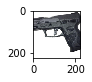

[0. 0. 1. 0.]


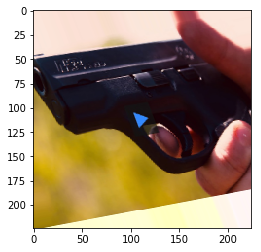

[0. 1. 0. 0.]


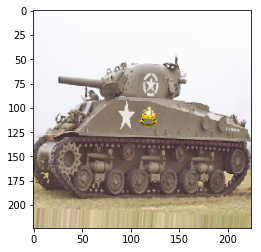

[0. 1. 0. 0.]


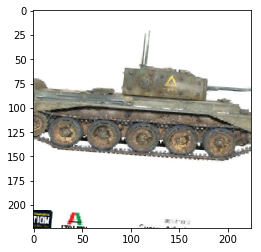

[1. 0. 0. 0.]


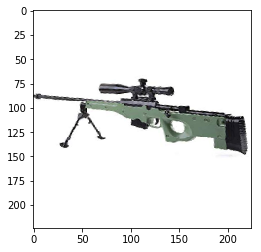

[0. 0. 1. 0.]


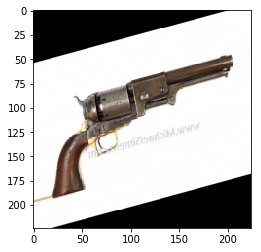

[0. 1. 0. 0.]


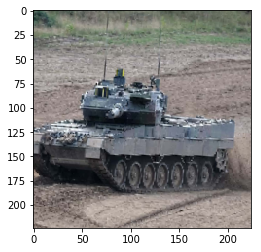

[1. 0. 0. 0.]


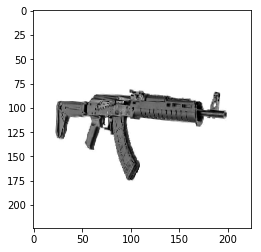

[0. 1. 0. 0.]


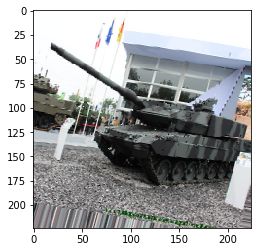

[0. 0. 1. 0.]


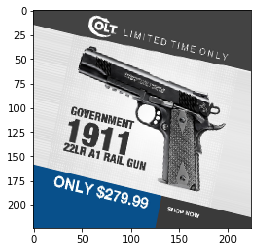

[0. 1. 0. 0.]


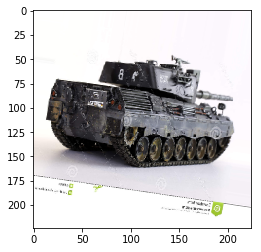

[0. 1. 0. 0.]


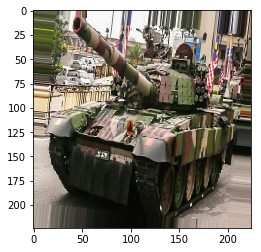

In [6]:
x,y = data.next()
plt.subplot(4,3,2)
for i in range(0,12):
    image = x[i]
    label = y[i]
    print (label)
    plt.imshow(image)
    plt.show()

In [7]:
len(data)

15

In [8]:
# Defining the Sequential model
model= Sequential()

In [9]:
#Adding up the layers of the network
model.add(Convolution2D(32,(3,3),input_shape=(224,224,4),padding = "Same",activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3)))
#model.add(Dropout(0.2))
model.add(Convolution2D(32,(3,3),padding = "Same",activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3)))
#model.add(Dropout(0.2))
model.add(Convolution2D(64,(3,3),padding = "Same",activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3)))
#model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(512, activation = "relu"))
model.add(Dropout(0.3))
model.add(Dense(256,activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(4,activation="softmax"))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [10]:
# Implementing the callback function so as to stop the algorithm from the furthur traning in case the accuracy dips down
clbk= keras.callbacks.EarlyStopping(monitor='accuracy',mode='min')

In [11]:
#Cmpiling the model
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [12]:
# Printing out the model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 32)      1184      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 74, 74, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
__________

In [13]:
# Training the model  
history_1 = model.fit_generator(data,steps_per_epoch=int(1273/20),epochs=10,shuffle=False,callbacks=[clbk])

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
63/63 [==============================] - 164s 3s/step - loss: 1.0567 - acc: 0.5287
Epoch 2/10
63/63 [==============================] - 157s 2s/step - loss: 0.6865 - acc: 0.7383
Epoch 3/10
63/63 [==============================] - 159s 3s/step - loss: 0.5453 - acc: 0.7930
Epoch 4/10
63/63 [==============================] - 158s 3s/step - loss: 0.4174 - acc: 0.8432
Epoch 5/10
63/63 [==============================] - 157s 2s/step - loss: 0.3670 - acc: 0.8657
Epoch 6/10
63/63 [==============================] - 157s 2s/step - loss: 0.3241 - acc: 0.8814
Epoch 7/10
63/63 [==============================] - 158s 3s/step - loss: 0.2982 - acc: 0.8912
Epoch 8/10
63/63 [==============================] - 157s 2s/step - loss: 0.2589 - acc: 0.9035
Epoch 9/10
63/63 [==============================] - 158s 3s/step - loss: 0.2366 - acc: 0.9172
Epoch 10/10
63/63 [==============================] - 155s 2s/step - loss: 0.2022 - acc: 0.9276


In [14]:
history_1.history

{'loss': [1.0573582788515963,
  0.6954477922445533,
  0.5414341025135047,
  0.4182612628678429,
  0.37469907649418266,
  0.3246615347645257,
  0.2993335084491526,
  0.26303684805943334,
  0.23609181603014537,
  0.2031373582505458],
 'acc': [0.5324505856069599,
  0.7333084683794443,
  0.7954121598308987,
  0.8452070085293586,
  0.8649006550787978,
  0.8823200218471206,
  0.8894069287946801,
  0.9013427784197457,
  0.9168220732648708,
  0.9279091649723143]}

In [15]:
model.save("Mymodel_1.h5")

In [16]:
loss= history_1.history["loss"]
acc= history_1.history["acc"]

Text(0.5, 1.0, 'Loss progression curve')

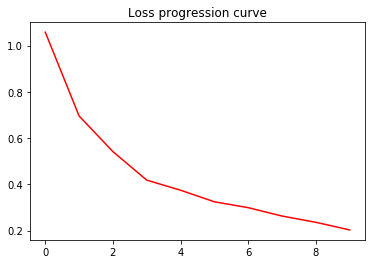

In [17]:
# Plotting the model loss
plt.plot(loss,color="r")
plt.title("Loss progression curve")

Text(0.5, 1.0, ' Accuracy progression curve')

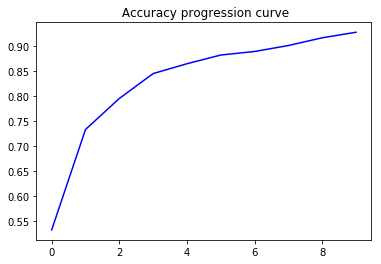

In [18]:
# Plotting the model accuracy
plt.plot(acc,color="b")
plt.title(" Accuracy progression curve")

**Transfer Learning**

In [19]:
#Importig the transfer learning model VGG19
from keras.applications import VGG19

In [20]:
# Assigning weight and input shape
model_sec=VGG19(weights="imagenet",include_top=False,input_shape=(224,224,3))
model_sec.summary()

80142336/80134624 [==============================] - 1s 0us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool

In [21]:
# Generating the data
data_final = ImageDataGenerator(rescale = 1/255, zoom_range = 0.2,horizontal_flip=True,vertical_flip=True).flow_from_directory(path,target_size=(224,224),color_mode="rgb",classes=["Rifle","tank","guns","knife images"],batch_size=90)

Found 1273 images belonging to 4 classes.


In [22]:
# Making the strting top layers of the model as non-trainable
for layer in model_sec.layers:
    layer.trainable=False

In [23]:
model_2=model_sec.output

In [24]:
# Adding the last trainable layers to the model
model_2= Flatten()(model_2)
model_2= Dense(512,activation="relu")(model_2)
model_2= Dropout(0.3)(model_2)
model_2= Dense(256,activation="relu")(model_2)
model_2= Dropout(0.3)(model_2)
pred= Dense(4,activation="softmax")(model_2)
model_final =Model(input=model_sec.input,output=pred)

In [25]:
# Compiling the model
model_final.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [26]:
# Training
history = model_final.fit_generator(data_final,steps_per_epoch=int(1273/80),epochs=8,shuffle=False,callbacks=[clbk])

Epoch 1/8
15/15 [==============================] - 31s 2s/step - loss: 3.2660 - acc: 0.4314
Epoch 2/8
15/15 [==============================] - 32s 2s/step - loss: 0.6642 - acc: 0.7803
Epoch 3/8
15/15 [==============================] - 30s 2s/step - loss: 0.3631 - acc: 0.8788
Epoch 4/8
15/15 [==============================] - 30s 2s/step - loss: 0.3002 - acc: 0.9063
Epoch 5/8
15/15 [==============================] - 31s 2s/step - loss: 0.2707 - acc: 0.9123
Epoch 6/8
15/15 [==============================] - 30s 2s/step - loss: 0.2466 - acc: 0.9144
Epoch 7/8
15/15 [==============================] - 31s 2s/step - loss: 0.3051 - acc: 0.8988
Epoch 8/8
15/15 [==============================] - 32s 2s/step - loss: 0.2338 - acc: 0.9312


In [27]:
history.history

{'loss': [3.3728810898075867,
  0.6857964942189342,
  0.3580020006397814,
  0.3149054152693509,
  0.2829796413847853,
  0.24430887804945342,
  0.29646065576003466,
  0.23436852380083192],
 'acc': [0.42969364758935014,
  0.7721916720423283,
  0.8805970051863581,
  0.9010211987843779,
  0.9073055618313103,
  0.9183032171799269,
  0.9018067510129895,
  0.9316574933954046]}

In [28]:
model_final.save("Myfinal_model_2.h5")

In [29]:
loss_final= history.history["loss"]
acc_final = history.history["acc"]

Text(0.5, 1.0, 'Loss Progression Curve')

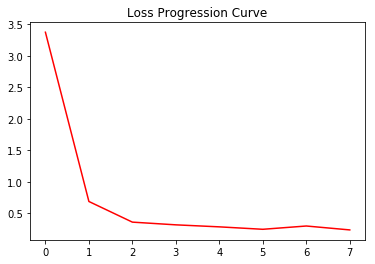

In [30]:
plt.plot(loss_final,color="r")
plt.title("Loss Progression Curve")

Text(0.5, 1.0, 'Accuracy Progression Curve')

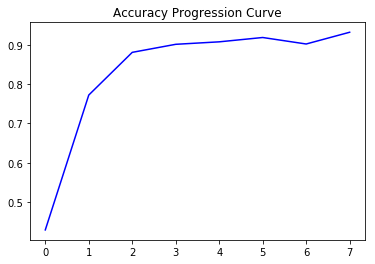

In [31]:
plt.plot(acc_final,color="b")
plt.title("Accuracy Progression Curve")